<a href="https://colab.research.google.com/github/puneet-08/projects/blob/main/Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Making Dataset

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 200, n_features=2, centers = 2, cluster_std= 5, random_state =1)
y = y.reshape(-1,1)

Plotting Dataset

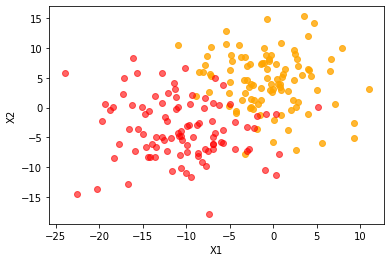

In [10]:
df = pd.DataFrame(np.hstack((X,y)), columns = ['x1', 'x2', 'y'])
plt.scatter(df[df['y']==0]['x1'].values ,df[df['y']==0]['x2'].values , color = 'orange', alpha = .8, marker = 'o')
plt.scatter(df[df['y']==1]['x1'].values ,df[df['y']==1]['x2'].values  , color = 'red', alpha = .6, marker = 'o')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

Defining the Sigmod Function

In [4]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

Training the Logistic Regression Model

In [5]:
def train(X,y,lr = 0.001, n_iters =1000):
  m,n = X.shape
  cost = []

  weights = np.zeros((n,1))
  bias = 0

  for i in range(n_iters+1):
    y_pred = sigmoid(np.dot(X,weights) + bias)
    cost_ = (-1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    cost.append(cost_)

    dw = 1/m * np.dot(X.T, (y_pred - y))
    db = 1/m * np.sum(y_pred - y)

    weights = weights - lr*dw
    bias = bias - lr*db

    if i%100 == 0:
      print(f"Cost after iteration {i}: {cost_}")
     

  return weights, bias, cost


In [6]:
weights, bias, cost = train(X,y)

Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 0.3826404608683957
Cost after iteration 200: 0.32925134412679974
Cost after iteration 300: 0.3066990907561544
Cost after iteration 400: 0.2943519765092589
Cost after iteration 500: 0.286624546357421
Cost after iteration 600: 0.28134702566477393
Cost after iteration 700: 0.27750356277049354
Cost after iteration 800: 0.2745591509147276
Cost after iteration 900: 0.2722078131373388
Cost after iteration 1000: 0.2702634723811102


Plotting Loss

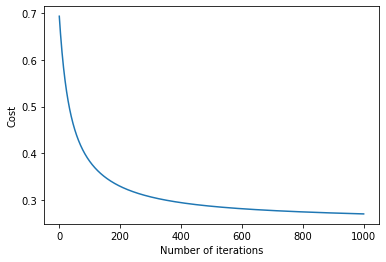

In [7]:
plt.plot(cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

Prediction and Accuracy

In [8]:
def predict(X,w,b,y):
  prediction =  sigmoid(np.dot(X,weights) + bias) >= 0.5
  print(f"Accuracy: {(y==prediction).sum()/X.shape[0]}")
  return prediction


In [9]:
pred = predict(X,weights,bias,y)

Accuracy: 0.875


Plotting Predicted Line

In [11]:
x_1 = np.linspace(-25,15).reshape(-1,1)
x_2 = -(bias +weights[0]*x_1)/weights[1]

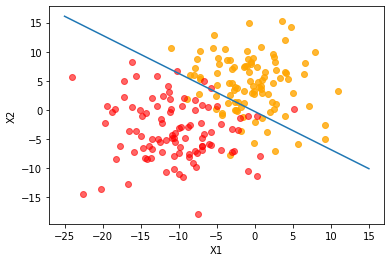

In [12]:
plt.scatter(df[df['y']==0]['x1'].values ,df[df['y']==0]['x2'].values , color = 'orange', alpha = .8, marker = 'o')
plt.scatter(df[df['y']==1]['x1'].values ,df[df['y']==1]['x2'].values  , color = 'red', alpha = .6, marker = 'o')
plt.plot(x_1, x_2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()